In [1]:
""" dictionary records of current weather obs from UW ATG """

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
atg_obs = pd.read_csv('../../Downloads/LFEM_data-.csv', low_memory=False, skiprows=1)
atg_obs

,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [3]:
atg_obs.insert(0, 'datetime_UTC', pd.to_datetime(atg_obs['Date'] + atg_obs['Time'], format='%Y-%m-%d%H:%M'))
atg_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,1999-07-30 00:09:00,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,1999-07-30 00:10:00,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,1999-07-30 00:11:00,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,1999-07-30 00:12:00,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,1999-07-30 00:13:00,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2024-04-30 19:28:00,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2024-04-30 19:29:00,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2024-04-30 19:30:00,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2024-04-30 19:31:00,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [4]:
no_erros_obs = atg_obs.loc[(atg_obs['Rain']!='M')&(atg_obs['Temperature']!='M')&(atg_obs['Pressure']!='M')&(atg_obs['Relhum']!='M')&(atg_obs['datetime_UTC']>=dt.datetime(2022,1,1))].copy()
no_erros_obs['Rain'] = no_erros_obs['Rain'].astype(float)
no_erros_obs['Temperature'] = no_erros_obs['Temperature'].astype(float)
no_erros_obs['Pressure'] = no_erros_obs['Pressure'].astype(float)
no_erros_obs['Relhum'] = no_erros_obs['Relhum'].astype(float)

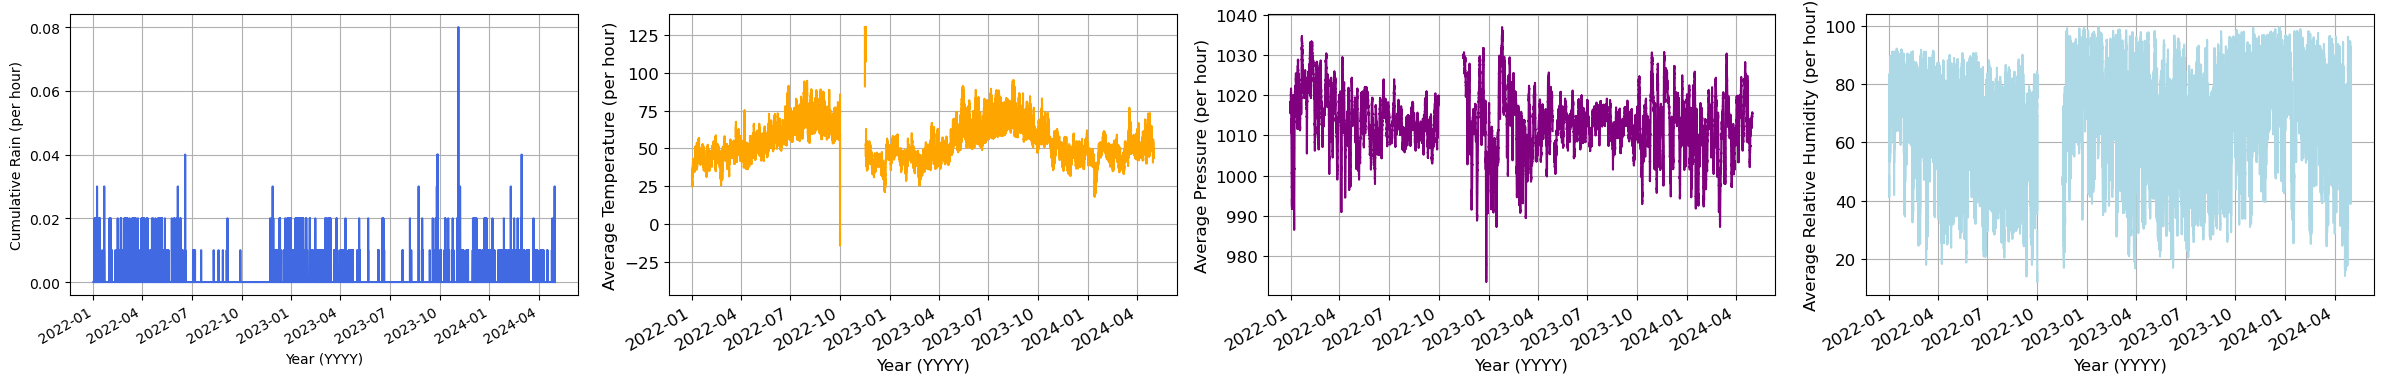

In [5]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1T')

summed_press_each_period = first_obs_each_period['Pressure'].mean().reset_index()
summed_relhum_each_period = first_obs_each_period['Relhum'].mean().reset_index()
summed_temp_each_period = first_obs_each_period['Temperature'].mean().reset_index()
summed_rain_each_period = first_obs_each_period['Rain'].sum().reset_index()

plt.figure(figsize=(24,4))

plt.subplot(1,4,1)
plt.rcParams.update({'font.size':12})
plt.plot(summed_rain_each_period['datetime_UTC'], summed_rain_each_period['Rain'], color='royalblue')
plt.grid(which='both')
plt.ylabel('Cumulative Rain (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.subplot(1,4,2)
plt.rcParams.update({'font.size':12})
plt.plot(summed_temp_each_period['datetime_UTC'], summed_temp_each_period['Temperature'], color='orange')
plt.grid(which='both')
plt.ylabel('Average Temperature (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.subplot(1,4,3)
plt.rcParams.update({'font.size':12})
plt.plot(summed_press_each_period['datetime_UTC'], summed_press_each_period['Pressure'], color='purple')
plt.grid(which='both')
plt.ylabel('Average Pressure (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.subplot(1,4,4)
plt.rcParams.update({'font.size':12})
plt.plot(summed_relhum_each_period['datetime_UTC'], summed_relhum_each_period['Relhum'], color='lightblue')
plt.grid(which='both')
plt.ylabel('Average Relative Humidity (per hour)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [6]:
no_erros_obs.loc[no_erros_obs['Rain']>=0.01]

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
11694565,2022-01-02 19:32:00,2.459583e+06,2022-01-02,19:32,38.4,31.700000,76.6,10.400000,12.900000,217,1004.8,19.5,864.23,0.01
11694570,2022-01-02 19:37:00,2.459583e+06,2022-01-02,19:37,38.1,32.400000,79.6,9.500000,12.100000,226,1004.9,27.6,864.24,0.01
11694574,2022-01-02 19:41:00,2.459583e+06,2022-01-02,19:41,37.8,32.600000,81.3,10.500000,14.200000,218,1004.5,28.9,864.25,0.01
11694579,2022-01-02 19:46:00,2.459583e+06,2022-01-02,19:46,37.8,33.000000,82.6,8.700000,9.500000,227,1004.7,42.1,864.26,0.01
11694590,2022-01-02 19:57:00,2.459583e+06,2022-01-02,19:57,37.7,33.400000,84.3,10.500000,11.800000,207,1004.4,42.7,864.27,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12908279,2024-04-30 01:32:00,2.460431e+06,2024-04-30,01:32,46.1,39.600000,78.1,10.300000,11.400000,12,1014.6,31.2,967.63,0.01
12908281,2024-04-30 01:34:00,2.460431e+06,2024-04-30,01:34,46.0,39.600000,78.2,8.300000,10.800000,31,1014.5,48.8,967.64,0.01
12908284,2024-04-30 01:37:00,2.460431e+06,2024-04-30,01:37,46.1,39.900000,78.9,9.700000,11.900000,17,1014.4,112.2,967.65,0.01
12908770,2024-04-30 09:43:00,2.460431e+06,2024-04-30,09:43,44.7,37.900000,76.8,11.000000,13.400000,145,1014.9,0.0,967.66,0.01


In [7]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1H')
summed_rain_each_period = first_obs_each_period['Rain'].sum()

In [8]:
lightrainfall_times = summed_rain_each_period[(summed_rain_each_period<0.10)&(summed_rain_each_period>0.0)]
moderaterainfall_times = summed_rain_each_period[(summed_rain_each_period<0.30)&(summed_rain_each_period>0.10)]
heavyrainfall_times = summed_rain_each_period[(summed_rain_each_period>0.30)]
heavyrainfall_times

datetime_UTC
2022-01-03 03:00:00    0.35
2022-06-05 15:00:00    0.42
2022-06-19 03:00:00    0.31
2022-06-19 04:00:00    0.32
2022-12-24 17:00:00    0.36
2023-06-19 09:00:00    0.31
2023-11-04 17:00:00    0.36
2024-04-29 11:00:00    0.38
Name: Rain, dtype: float64

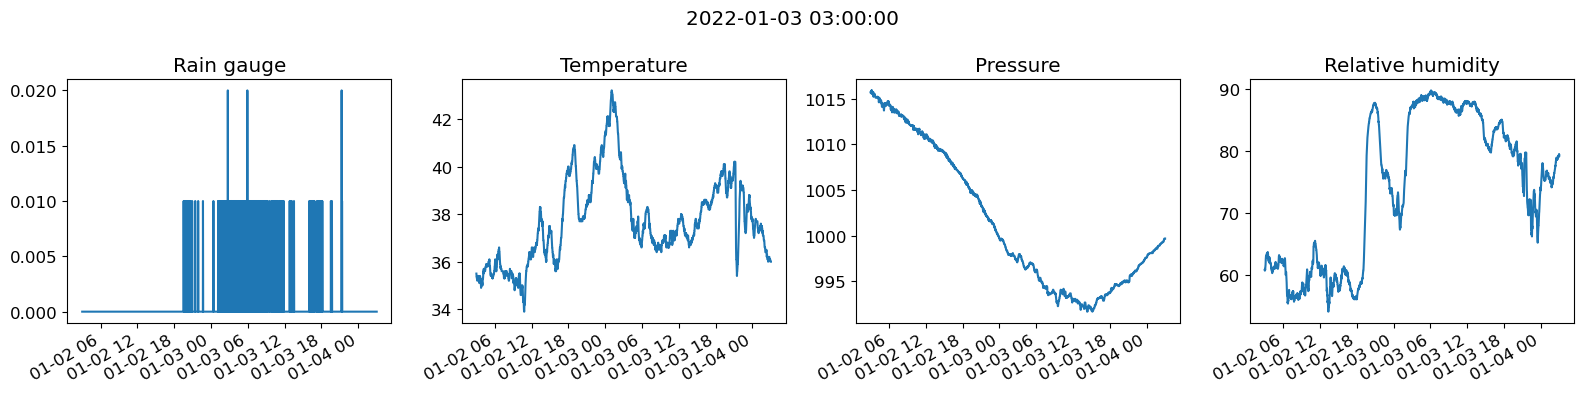

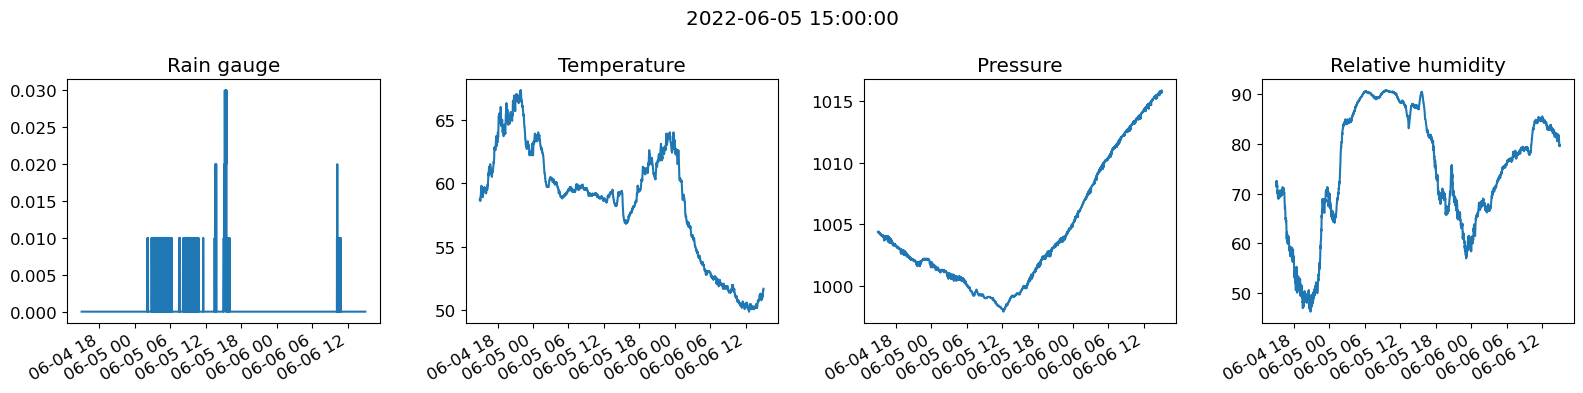

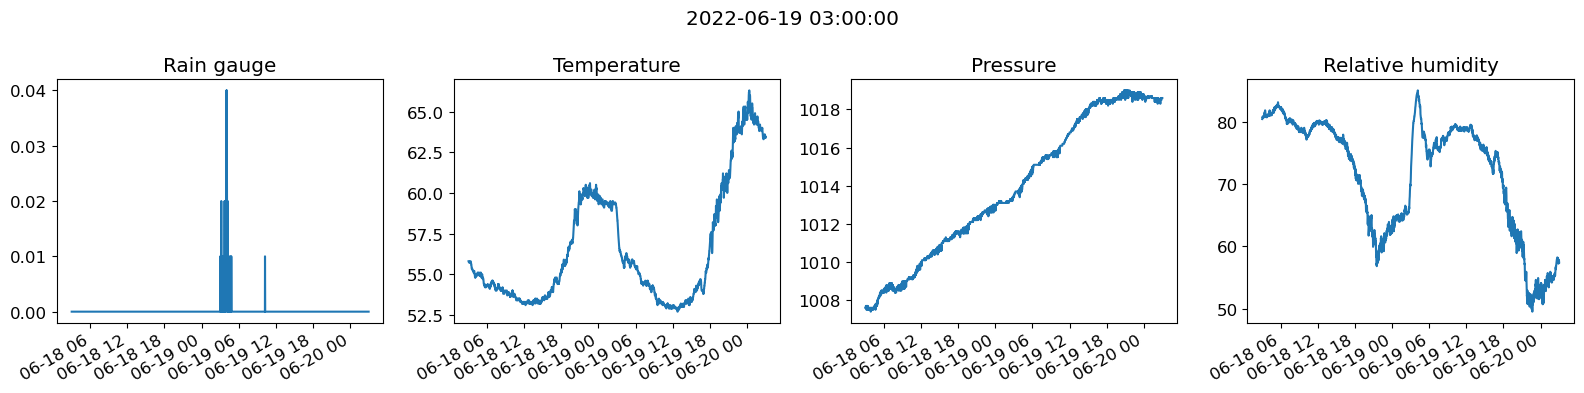

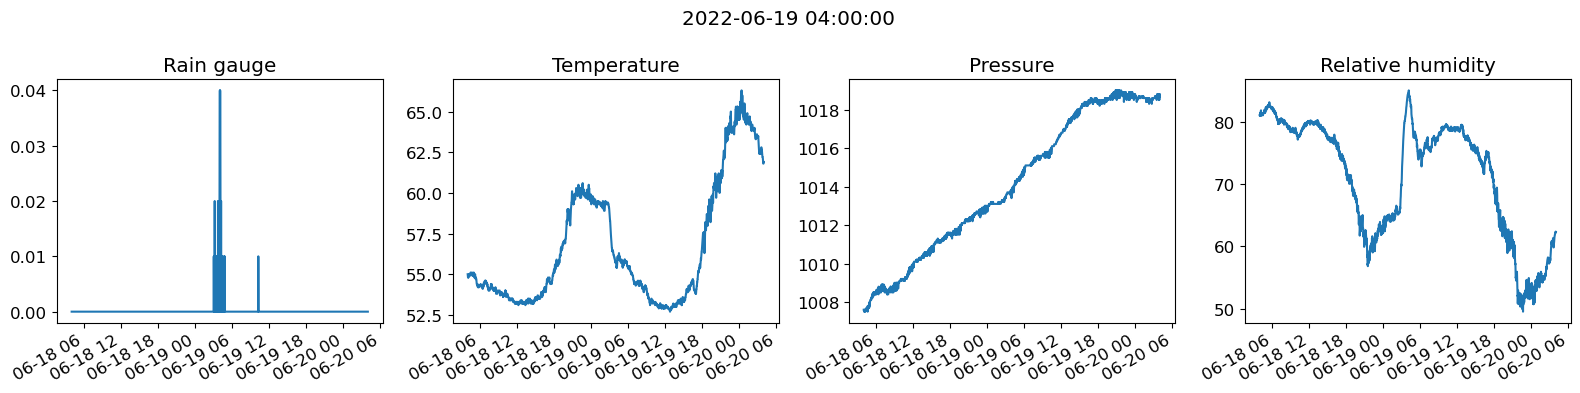

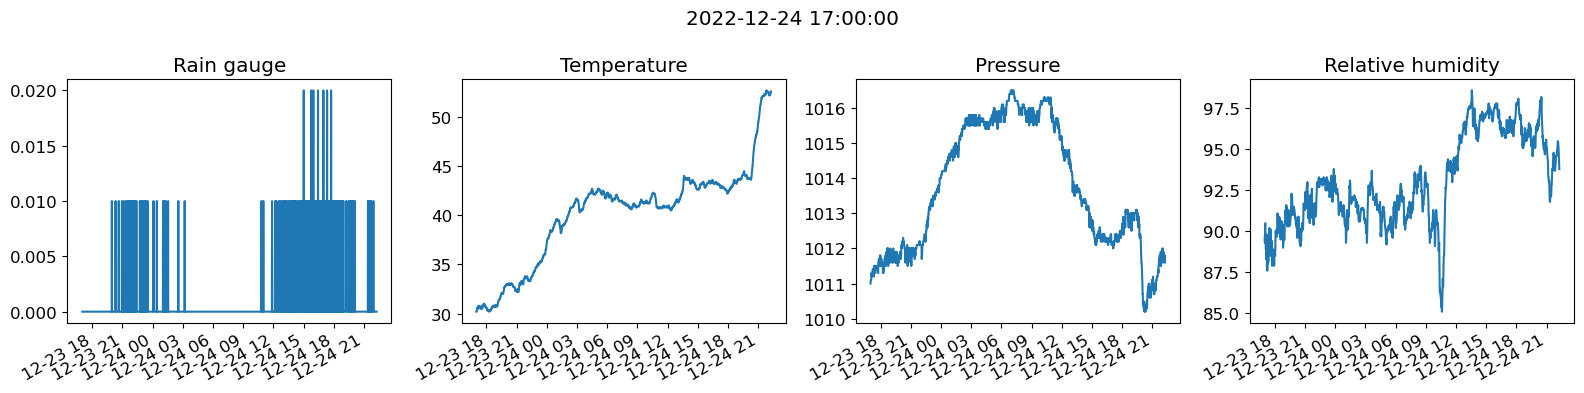

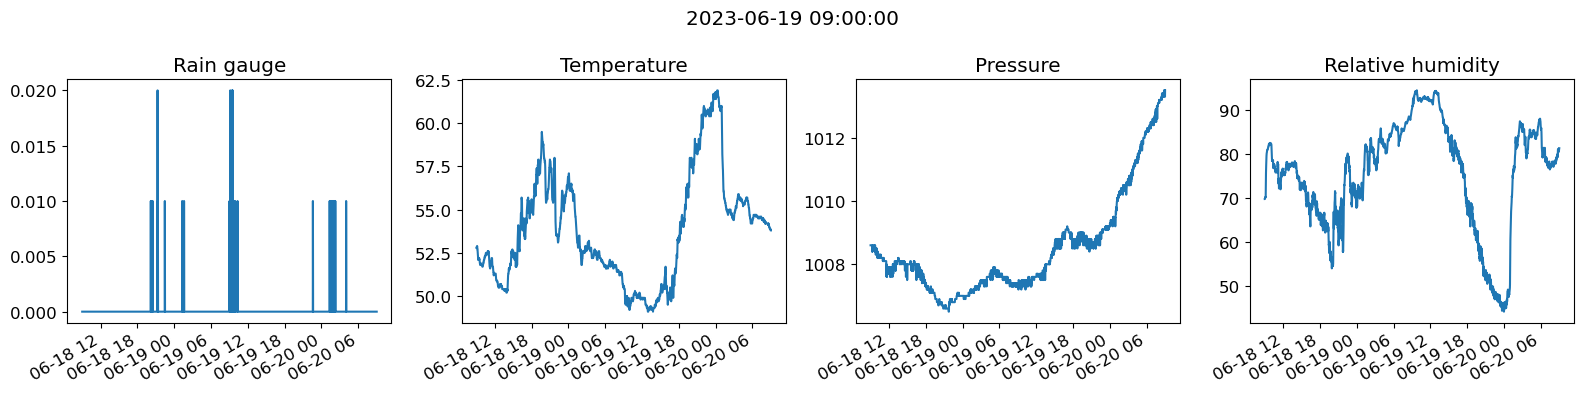

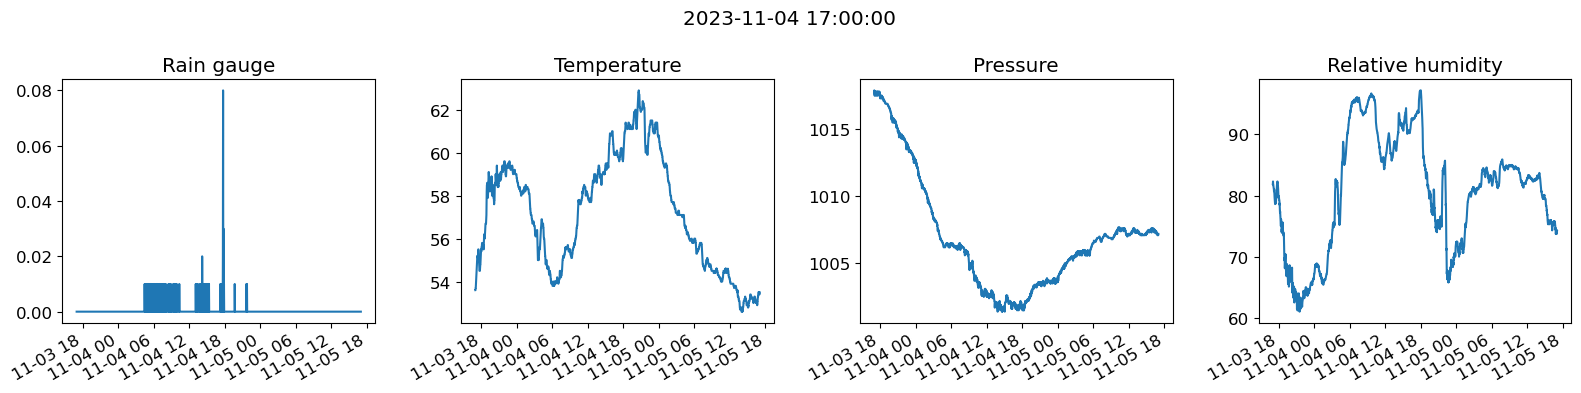

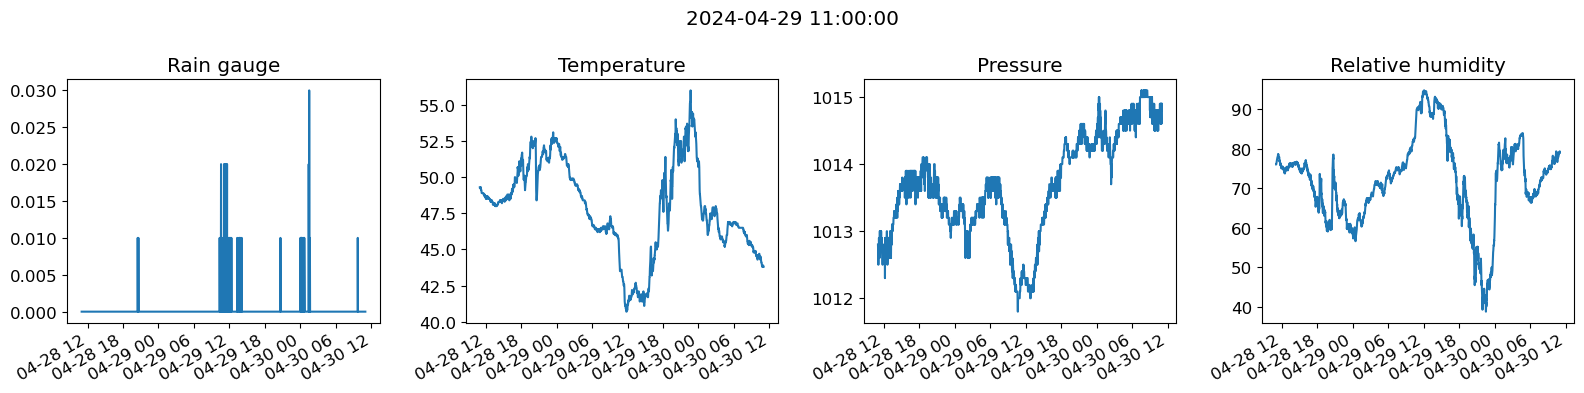

In [27]:
dt_obs = no_erros_obs.set_index('datetime_UTC')
for rain_dt in heavyrainfall_times.index:
    event_df = dt_obs.loc[rain_dt - pd.Timedelta(hours=24):rain_dt + pd.Timedelta(hours=24)]
    plt.figure(figsize=(16,4))
    plt.suptitle(f'{rain_dt}')

    plt.subplot(141)
    plt.title('Rain gauge')
    plt.plot(event_df.index, event_df['Rain'])

    plt.subplot(142)
    plt.title('Temperature')
    plt.plot(event_df.index, event_df['Temperature'])

    plt.subplot(143)
    plt.title('Pressure')
    plt.plot(event_df.index, event_df['Pressure'])

    plt.subplot(144)
    plt.title('Relative humidity')
    plt.plot(event_df.index, event_df['Relhum'])
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()